In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Set DV and IV

In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

# Create simple linear regression model

In [6]:
from sklearn.linear_model import LinearRegression
# create linear regression object
lin_reg= LinearRegression()
lin_reg.fit(X, y)

/Users/tzhu9/miniconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Fit simple linear regression model to data

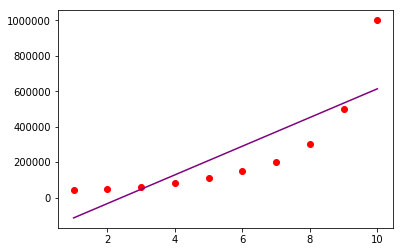

In [52]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'purple')

# Create polynomial regression model 

In [7]:
from sklearn.preprocessing import PolynomialFeatures
# transform matrix of feature X into X-Poly matrix, new matrix include X^2, X^3...., X^n as dependent variables
poly_reg= PolynomialFeatures(degree=4)
# transform X from vector to matrix
X_poly= poly_reg.fit_transform(X)

In [8]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [9]:
lin_reg_2= LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Fit polynomial regression model to data

In [11]:
# Create intervals at .1 rather than 1 to be more precise
X_grid= np.arange(min(X), max(X), 0.1)
X_grid= X_grid.reshape((len(X_grid), 1))

<function matplotlib.pyplot.show(*args, **kw)>

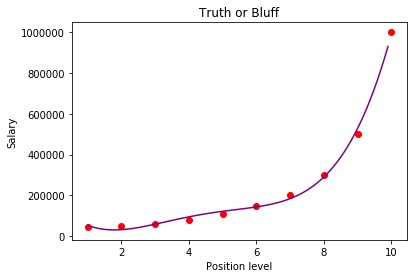

In [12]:
plt.scatter(X, y, color = 'red')
# using 'poly_reg.fit_transform(X)' instead of 'X_poly' is to make it more generic. 
# It can now transform and make prediction any matrix X, not just the pre-defined 'X_poly'
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'purple') 
plt.title('Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show

# Make prediction for Position level = 6.5 using both models

In [13]:
lin_reg.predict(6.5)

array([330378.78787879])

In [16]:
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([158862.45265155])